In [1]:
import pandas as pd
import umap
import glob
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
# from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA, FastICA
# import psyplot.project as psy
from sklearn.svm import SVR

from sklearn.decomposition import PCA, KernelPCA

from matplotlib.colors import LogNorm
import math

/neurospin/dico/jchavas/Runs/82_V1_after_ablation/Program/venv_rosette/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/ScCal-SLi_left"
model_path = glob.glob(f"{path}/*")[0]
ukb_emb_file = f"{model_path}/cadasil_random_embeddings/full_embeddings.csv"
print(ukb_emb_file)

/neurospin/dico/data/deep_folding/current/models/Champollion_V1_after_ablation/ScCal-SLi_left/name07-41-43_180/cadasil_random_embeddings/full_embeddings.csv


In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32
ID,,,,,,,,,,,,,,,,,,,,,
rv_BIOMRI_CADA_001_010_RG_S3_3DT1_mprage_1iso_ipat2,-20.320560,-62.267143,-1.707465,-11.727560,23.603527,14.814549,-23.993296,24.922860,9.470492,81.072105,...,-94.678330,-94.509920,-24.219425,12.572232,49.271380,-44.284935,-22.662569,2.459032,-12.009532,-34.402893
rv_BIOMRI_CADA_001_011_BK_S3_3DT1_mprage_1iso_ipat2,-24.809960,-36.636135,0.100711,-49.535778,19.617350,12.782522,-17.915854,21.310144,12.687656,55.514957,...,-87.205185,-82.752930,16.931380,23.549236,51.374638,-47.621880,-34.359406,47.603226,-12.975651,22.204580
rv_BIOMRI_CADA_001_012_TE_2_S5_3DT1_mprage_1iso_ipat2,-25.467680,-57.371230,-7.638376,51.208490,-50.594803,15.259252,7.136220,-78.574420,2.161780,46.061750,...,-31.560982,-12.152405,-45.618954,18.579958,58.491290,-36.267868,-0.696094,-41.359340,-13.259213,-24.771881
rv_BIOMRI_CADA_001_012_TE_S3_3DT1_mprage_1iso_ipat2,-19.175705,-58.553406,-21.577020,52.281578,-28.308495,-6.704491,-6.500831,-64.698616,0.662296,25.479738,...,-20.553387,-5.685386,-33.837910,28.228882,38.440964,-32.607395,-21.934452,-33.473038,-26.640514,-9.761915
rv_BIOMRI_CADA_001_014_LV_S3_3DT1_mprage_1iso_ipat2,-3.715497,8.960602,36.894480,-0.922720,-66.377580,-16.550270,-82.173150,-63.815235,20.091890,-24.029125,...,19.392557,32.108860,14.598561,-12.115599,-7.218223,6.913606,16.629925,9.349553,29.263494,56.914474
rv_BIOMRI_CADA_001_017_LE_S3_3DT1_mprage_1iso_ipat2,-42.087080,-59.118053,-25.869085,34.548058,-11.231063,10.946714,-2.960723,-88.179090,3.048843,47.263800,...,-17.787966,-22.512570,8.471014,52.776540,49.828045,-71.787680,-39.062540,-50.702496,-21.000319,-20.412890
rv_BIOMRI_CADA_001_019_JM_S3_3DT1_mprage_1iso_ipat2,-24.623210,-46.123165,-13.525530,22.990875,6.256023,7.733440,-14.153894,-58.992134,6.371195,27.098340,...,-5.134343,-24.535700,19.197294,27.182123,65.001810,-72.086395,-19.517921,0.509782,-13.467318,11.552586
rv_BIOMRI_CADA_001_020_FJ_2_S3_3DT1_mprage_1iso_ipat2,-6.306077,-59.447613,-34.353962,42.159103,43.756520,50.552350,2.638759,-31.138866,-17.694624,43.607384,...,2.063466,-32.742790,-7.869605,13.765517,55.791710,-67.416920,-0.985926,-11.595201,-16.151049,-34.850975
rv_BIOMRI_CADA_001_020_FJ_S3_3DT1_mprage_1iso_ipat2,-4.694516,-61.461998,-37.790424,36.014175,34.055748,43.314484,21.393005,-26.084316,-17.715122,50.648090,...,-13.360105,-24.309727,-15.738182,23.758364,43.608700,-64.054900,0.985405,-4.213637,-14.067846,-48.128136


# cadasil

In [4]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [5]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32
ID,,,,,,,,,,,,,,,,,,,,,
rv_BIOMRI_CADA_001_010_RG_S3_3DT1_mprage_1iso_ipat2,-20.320560,-62.267143,-1.707465,-11.727560,23.603527,14.814549,-23.993296,24.922860,9.470492,81.072105,...,-94.678330,-94.509920,-24.219425,12.572232,49.271380,-44.284935,-22.662569,2.459032,-12.009532,-34.402893
rv_BIOMRI_CADA_001_011_BK_S3_3DT1_mprage_1iso_ipat2,-24.809960,-36.636135,0.100711,-49.535778,19.617350,12.782522,-17.915854,21.310144,12.687656,55.514957,...,-87.205185,-82.752930,16.931380,23.549236,51.374638,-47.621880,-34.359406,47.603226,-12.975651,22.204580
rv_BIOMRI_CADA_001_012_TE_2_S5_3DT1_mprage_1iso_ipat2,-25.467680,-57.371230,-7.638376,51.208490,-50.594803,15.259252,7.136220,-78.574420,2.161780,46.061750,...,-31.560982,-12.152405,-45.618954,18.579958,58.491290,-36.267868,-0.696094,-41.359340,-13.259213,-24.771881
rv_BIOMRI_CADA_001_012_TE_S3_3DT1_mprage_1iso_ipat2,-19.175705,-58.553406,-21.577020,52.281578,-28.308495,-6.704491,-6.500831,-64.698616,0.662296,25.479738,...,-20.553387,-5.685386,-33.837910,28.228882,38.440964,-32.607395,-21.934452,-33.473038,-26.640514,-9.761915
rv_BIOMRI_CADA_001_014_LV_S3_3DT1_mprage_1iso_ipat2,-3.715497,8.960602,36.894480,-0.922720,-66.377580,-16.550270,-82.173150,-63.815235,20.091890,-24.029125,...,19.392557,32.108860,14.598561,-12.115599,-7.218223,6.913606,16.629925,9.349553,29.263494,56.914474
rv_BIOMRI_CADA_001_017_LE_S3_3DT1_mprage_1iso_ipat2,-42.087080,-59.118053,-25.869085,34.548058,-11.231063,10.946714,-2.960723,-88.179090,3.048843,47.263800,...,-17.787966,-22.512570,8.471014,52.776540,49.828045,-71.787680,-39.062540,-50.702496,-21.000319,-20.412890
rv_BIOMRI_CADA_001_019_JM_S3_3DT1_mprage_1iso_ipat2,-24.623210,-46.123165,-13.525530,22.990875,6.256023,7.733440,-14.153894,-58.992134,6.371195,27.098340,...,-5.134343,-24.535700,19.197294,27.182123,65.001810,-72.086395,-19.517921,0.509782,-13.467318,11.552586
rv_BIOMRI_CADA_001_020_FJ_2_S3_3DT1_mprage_1iso_ipat2,-6.306077,-59.447613,-34.353962,42.159103,43.756520,50.552350,2.638759,-31.138866,-17.694624,43.607384,...,2.063466,-32.742790,-7.869605,13.765517,55.791710,-67.416920,-0.985926,-11.595201,-16.151049,-34.850975
rv_BIOMRI_CADA_001_020_FJ_S3_3DT1_mprage_1iso_ipat2,-4.694516,-61.461998,-37.790424,36.014175,34.055748,43.314484,21.393005,-26.084316,-17.715122,50.648090,...,-13.360105,-24.309727,-15.738182,23.758364,43.608700,-64.054900,0.985405,-4.213637,-14.067846,-48.128136


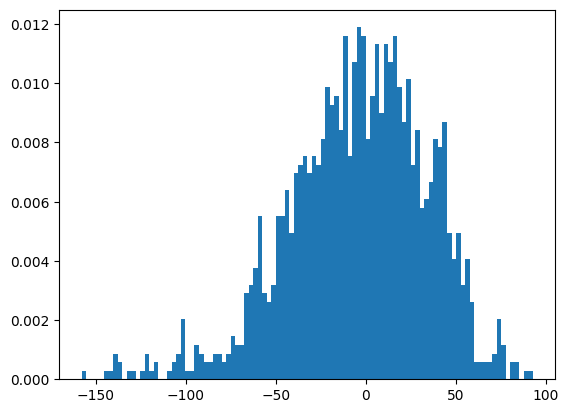

In [6]:
p = plt.hist(ukb_emb.values.ravel(), bins=100, density=True)

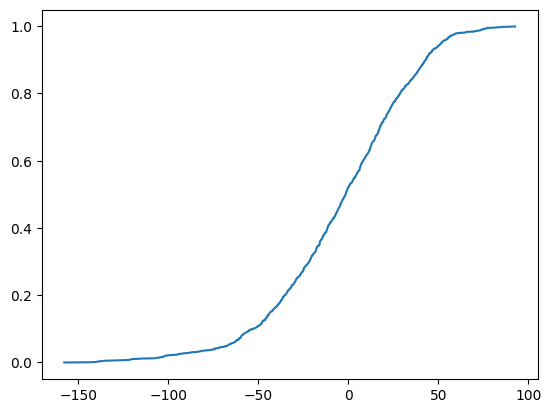

In [7]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [8]:
X2[int(N*0.59)]

7.1362195

In [9]:
len(ukb_emb)

43

In [10]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [11]:
ukb_positive

dim10    0.953488
dim12    0.930233
dim27    0.930233
dim6     0.906977
dim11    0.906977
dim4     0.883721
dim26    0.790698
dim14    0.790698
dim15    0.744186
dim19    0.744186
dim21    0.651163
dim20    0.627907
dim18    0.604651
dim13    0.558140
dim32    0.534884
dim9     0.465116
dim30    0.465116
dim7     0.372093
dim3     0.372093
dim29    0.348837
dim25    0.348837
dim17    0.302326
dim5     0.255814
dim31    0.255814
dim24    0.116279
dim1     0.116279
dim2     0.093023
dim8     0.069767
dim16    0.069767
dim23    0.069767
dim28    0.046512
dim22    0.023256
dtype: float64

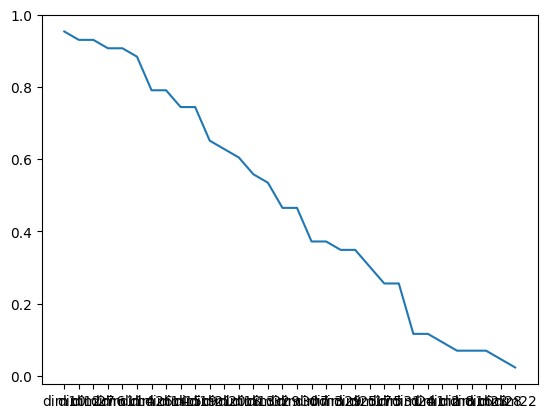

In [12]:
plt.plot(ukb_positive)

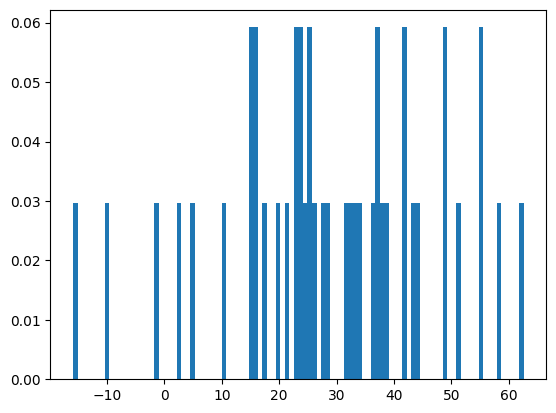

In [13]:
p = plt.hist(ukb_emb.loc[:,"dim12"], bins=100, density=True)

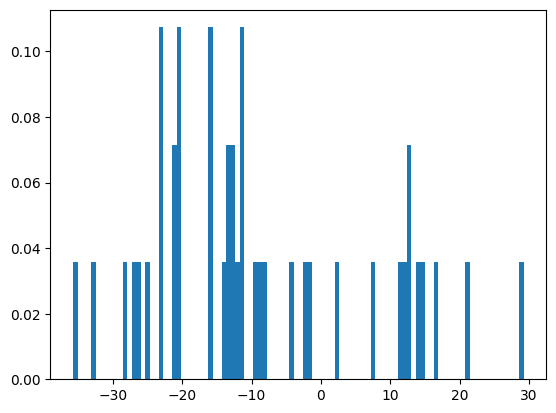

In [14]:
p = plt.hist(ukb_emb.loc[:,"dim31"], bins=100, density=True)

# UMAP

In [15]:
def compute_umap(df, n_neighbors=15, n_components=2):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [110]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=5)

/neurospin/dico/jchavas/Runs/82_V1_after_ablation/Program/venv_rosette/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


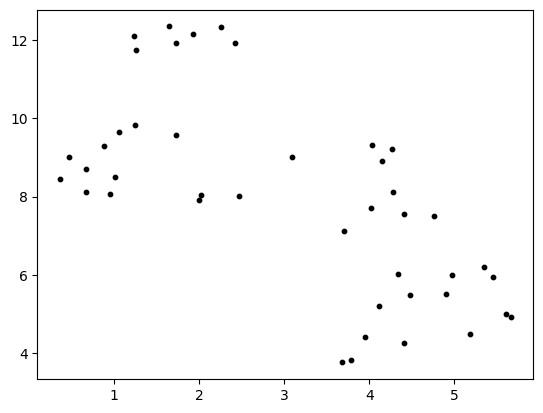

In [111]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=10, alpha=1)

In [77]:
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32
ID,,,,,,,,,,,,,,,,,,,,,
rv_BIOMRI_CADA_001_010_RG_S3_3DT1_mprage_1iso_ipat2,-20.320560,-62.267143,-1.707465,-11.727560,23.603527,14.814549,-23.993296,24.922860,9.470492,81.072105,...,-94.678330,-94.509920,-24.219425,12.572232,49.271380,-44.284935,-22.662569,2.459032,-12.009532,-34.402893
rv_BIOMRI_CADA_001_011_BK_S3_3DT1_mprage_1iso_ipat2,-24.809960,-36.636135,0.100711,-49.535778,19.617350,12.782522,-17.915854,21.310144,12.687656,55.514957,...,-87.205185,-82.752930,16.931380,23.549236,51.374638,-47.621880,-34.359406,47.603226,-12.975651,22.204580
rv_BIOMRI_CADA_001_012_TE_2_S5_3DT1_mprage_1iso_ipat2,-25.467680,-57.371230,-7.638376,51.208490,-50.594803,15.259252,7.136220,-78.574420,2.161780,46.061750,...,-31.560982,-12.152405,-45.618954,18.579958,58.491290,-36.267868,-0.696094,-41.359340,-13.259213,-24.771881
rv_BIOMRI_CADA_001_012_TE_S3_3DT1_mprage_1iso_ipat2,-19.175705,-58.553406,-21.577020,52.281578,-28.308495,-6.704491,-6.500831,-64.698616,0.662296,25.479738,...,-20.553387,-5.685386,-33.837910,28.228882,38.440964,-32.607395,-21.934452,-33.473038,-26.640514,-9.761915
rv_BIOMRI_CADA_001_014_LV_S3_3DT1_mprage_1iso_ipat2,-3.715497,8.960602,36.894480,-0.922720,-66.377580,-16.550270,-82.173150,-63.815235,20.091890,-24.029125,...,19.392557,32.108860,14.598561,-12.115599,-7.218223,6.913606,16.629925,9.349553,29.263494,56.914474


In [112]:
reduced_ukb_emb, reducer_red = compute_umap(ukb_emb, n_neighbors=5, n_components=20)

/neurospin/dico/jchavas/Runs/82_V1_after_ablation/Program/venv_rosette/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


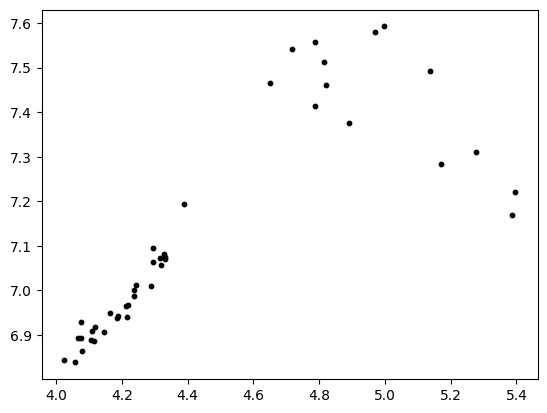

In [113]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=10, alpha=1)

In [88]:
reduced_ukb_emb.shape

(43, 20)

In [89]:
umap_ukb = visual_ukb_emb

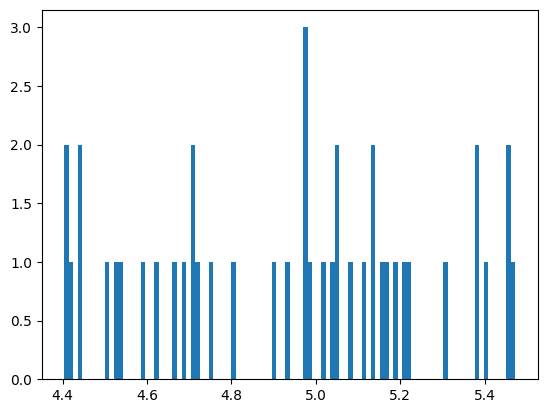

In [90]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

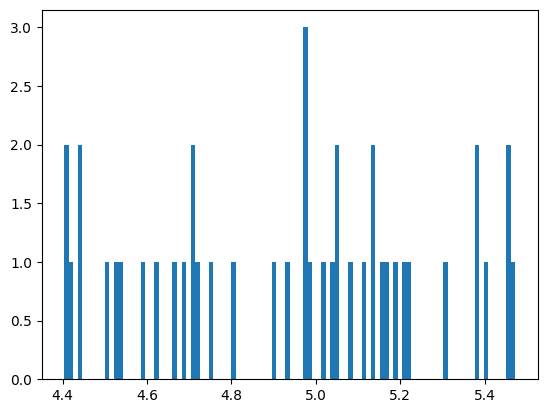

In [91]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

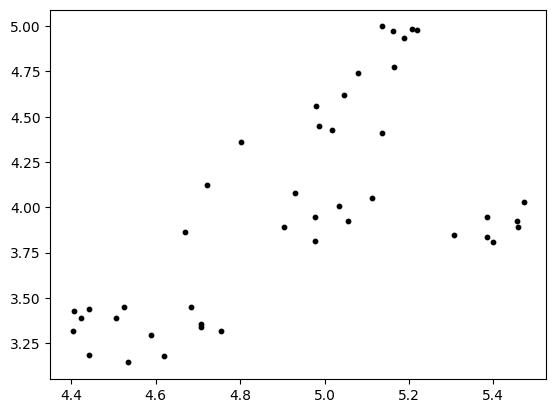

In [92]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,2], c='black', s=10, alpha=1)

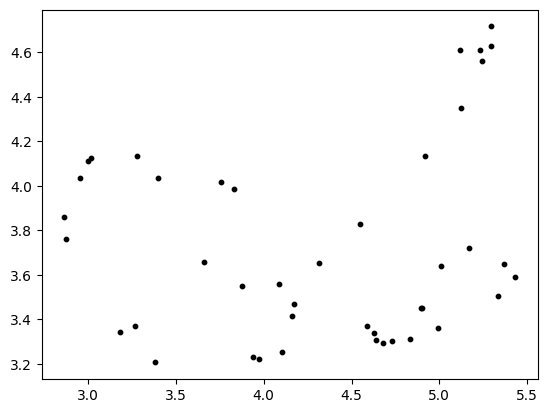

In [93]:
plt.scatter(reduced_ukb_emb[:,4], reduced_ukb_emb[:,5], c='black', s=10, alpha=1)

In [94]:
my_model = PCA(n_components=20)
on_axes_PCA = my_model.fit_transform(ukb_emb)
explained_all = my_model.explained_variance_ratio_.cumsum()

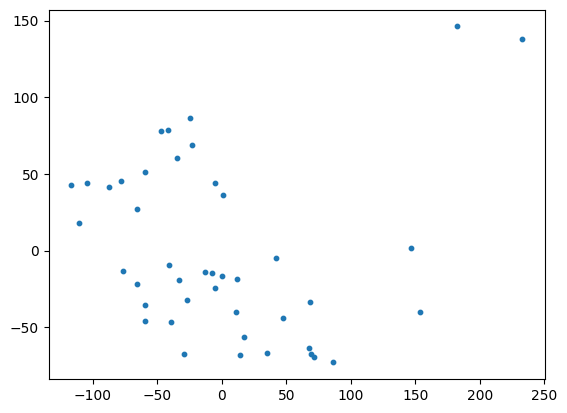

In [95]:
plt.scatter(on_axes_PCA[:,0], on_axes_PCA[:,1], s=10)

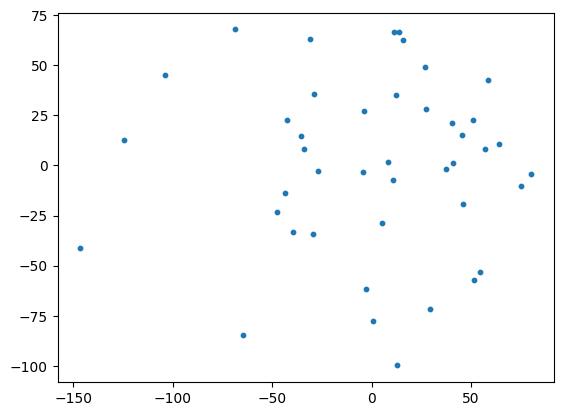

In [96]:
plt.scatter(on_axes_PCA[:,2], on_axes_PCA[:,3], s=10)

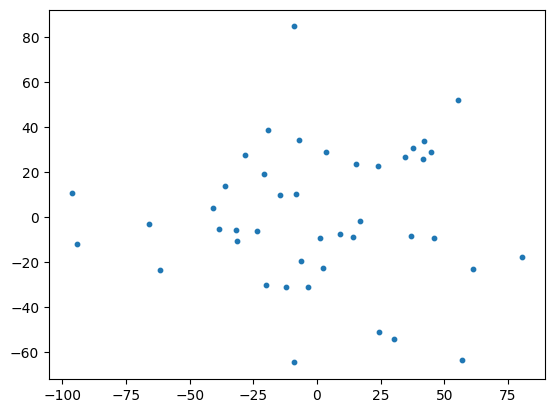

In [97]:
plt.scatter(on_axes_PCA[:,4], on_axes_PCA[:,5], s=10)

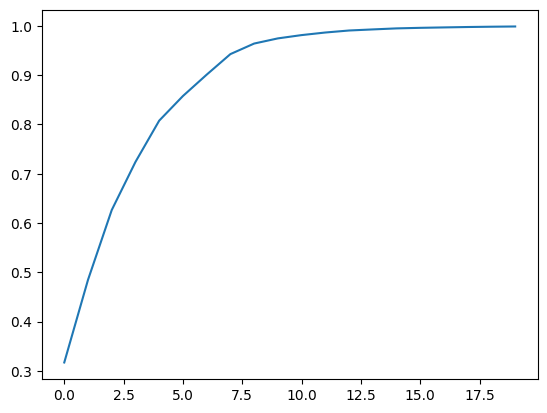

In [98]:
plt.plot(explained_all)
plt.show()

In [99]:
reduced_ukb_emb.shape

(43, 20)

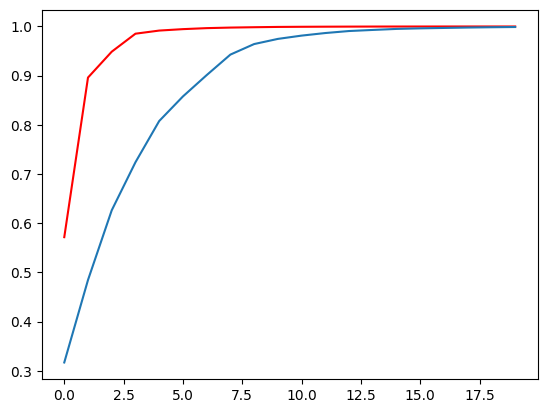

In [101]:
my_model = PCA(n_components=20)
on_axes = my_model.fit_transform(reduced_ukb_emb)
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)
plt.show()

In [102]:
explained

array([0.57160884, 0.89615756, 0.9487344 , 0.98533154, 0.9916722 ,
       0.99458754, 0.9966311 , 0.997763  , 0.99848604, 0.9990907 ,
       0.99938196, 0.99957746, 0.9997259 , 0.99983907, 0.99989957,
       0.9999374 , 0.9999687 , 0.9999856 , 0.99999356, 0.99999994],
      dtype=float32)

In [114]:
explained_all

array([0.31681621, 0.4845476 , 0.62623407, 0.72396316, 0.80775396,
       0.85774775, 0.90109193, 0.94283245, 0.96425478, 0.97473754,
       0.98143263, 0.9866705 , 0.99075972, 0.99295777, 0.99504511,
       0.99617585, 0.99702442, 0.99784185, 0.99844948, 0.99892597])

In [103]:
on_axes.shape

(43, 20)

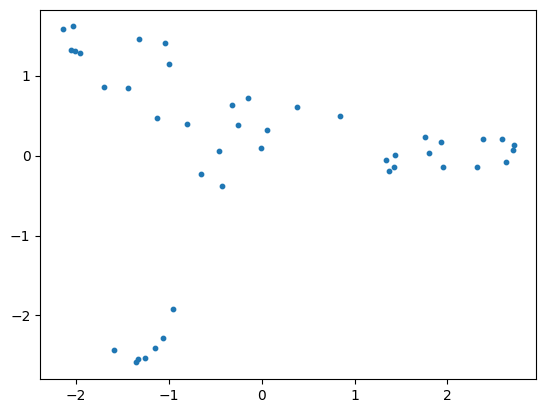

In [104]:
plt.scatter(on_axes[:,0], on_axes[:,1], s=10)

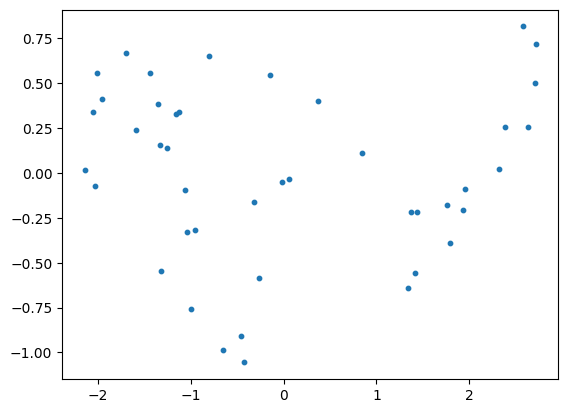

In [105]:
plt.scatter(on_axes[:,0], on_axes[:,2], s=10)
plt.show()

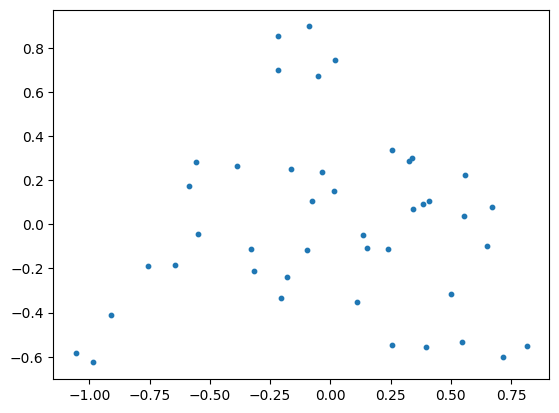

In [106]:
plt.scatter(on_axes[:,2], on_axes[:,3], s=10)
plt.show()

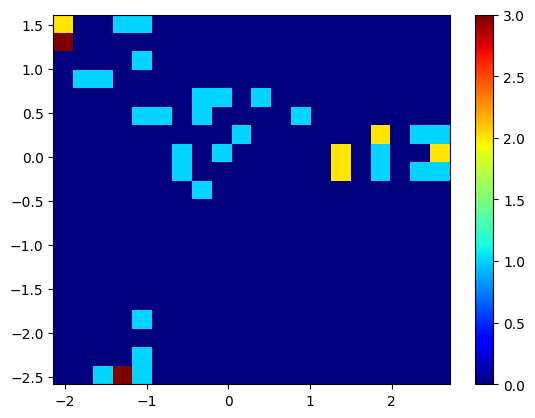

In [109]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,1], bins=(20,20))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()